Leggiamo e rappresentiamo un dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Ricostruzione della popolazione 2002-2019.csv', encoding='latin-1', sep=';')
df.head()

,Codice regione,Regione,Età,Sesso,Popolazione
0,1.0,Piemonte,0,Totale,28544.0
1,1.0,Piemonte,0,Maschi,14656.0
2,1.0,Piemonte,0,Femmine,13888.0
3,1.0,Piemonte,1,Totale,29793.0
4,1.0,Piemonte,1,Maschi,15269.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6061 entries, 0 to 6060
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Codice regione  6060 non-null   float64
 1   Regione         6060 non-null   object 
 2   Età             6060 non-null   object 
 3   Sesso           6060 non-null   object 
 4   Popolazione     6060 non-null   float64
dtypes: float64(2), object(3)
memory usage: 236.9+ KB


In [2]:
df.dtypes

Codice regione    float64
Regione            object
Età                object
Sesso              object
Popolazione       float64
dtype: object

Procedo con preprocessare i dati.

Voglio convertire i tipi delle serie ma noto che nella colonna dell'età e della Popolazione ci sono oggetti non formattabili

In [3]:
df['Età'] = df['Età'].replace('100 e oltre', '100')
df['Età'].isna().sum()

1

In [4]:
df['Età'] = df['Età'].fillna('100')
df['Età'].isna().sum()

0

In [5]:
np.isinf(df['Popolazione']).sum()

0

In [6]:
x = df[df['Popolazione'].isna()]
x

,Codice regione,Regione,Età,Sesso,Popolazione
6060,NaN,NaN,100,NaN,NaN


La riga appena visualizzata non aggiunge alcun tipo di informazione e dà problemi , la droppo

In [7]:
df = df.drop(6060)
df['Popolazione'].isna().sum()

0

In [8]:
df['Età'] = df['Età'].astype(int)
df['Popolazione'] = df['Popolazione'].astype(int)
df.dtypes

Codice regione    float64
Regione            object
Età                 int32
Sesso              object
Popolazione         int32
dtype: object

Provo a capire perché non mi trasforma 'Regione' e 'Sesso' in stringa

In [9]:
df['Regione'].unique()

array(['Piemonte', "Valle D'Aosta/Vallée D'Aoste", 'Lombardia',
       'Trentino-Alto Adige/Südtirol', 'Veneto', 'Friuli-Venezia Giulia',
       'Liguria', 'Emilia-Romagna', 'Toscana', 'Umbria', 'Marche',
       'Lazio', 'Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata',
       'Calabria', 'Sicilia', 'Sardegna'], dtype=object)

In [10]:
df['Sesso'].unique()

array(['Totale', 'Maschi', 'Femmine'], dtype=object)

Grafici

Guardiamo la popolazione per ogni regione tra il 2002 e il 2019

In [11]:
df['Regione'] = df['Regione'].replace('Trentino-Alto Adige/Südtirol','Trentino')
df['Regione'] = df['Regione'].replace('Friuli-Venezia Giulia','Friuli')
df['Regione'] = df['Regione'].replace("Valle D'Aosta/Vallée D'Aoste","Valle D'Aosta")
df['Regione'].unique()

array(['Piemonte', "Valle D'Aosta", 'Lombardia', 'Trentino', 'Veneto',
       'Friuli', 'Liguria', 'Emilia-Romagna', 'Toscana', 'Umbria',
       'Marche', 'Lazio', 'Abruzzo', 'Molise', 'Campania', 'Puglia',
       'Basilicata', 'Calabria', 'Sicilia', 'Sardegna'], dtype=object)

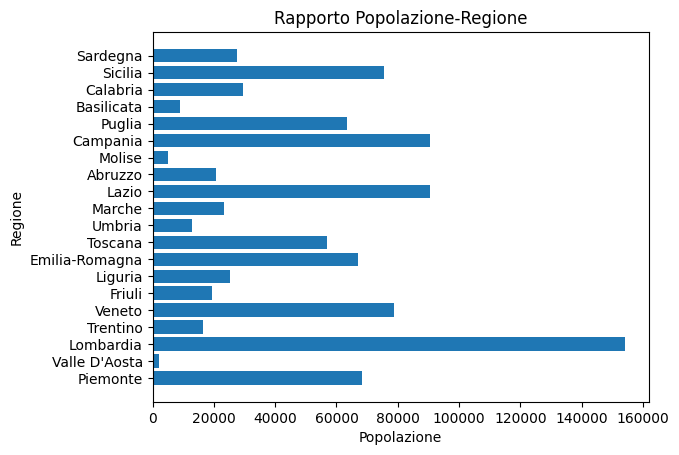

In [12]:
plt.barh(df['Regione'], df['Popolazione'])
plt.xlabel('Popolazione')
plt.ylabel('Regione')
plt.title('Rapporto Popolazione-Regione')
plt.legend
plt.show()